In [8]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [9]:
data = pd.read_csv("birds.csv")

data.head()

,gender,body_mass,beak_length,beak_depth,fin_length,bird category
0,male,3750,39.1,18.7,181,A
1,female,3800,39.5,17.4,186,A
2,female,3250,40.3,18.0,195,A
3,female,3500,39.6,17.7,186,A
4,female,3450,36.7,19.3,193,A


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         144 non-null    object 
 1   body_mass      150 non-null    int64  
 2   beak_length    150 non-null    float64
 3   beak_depth     150 non-null    float64
 4   fin_length     150 non-null    int64  
 5   bird category  150 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 7.2+ KB


In [11]:
data.isnull().sum()

gender           6
body_mass        0
beak_length      0
beak_depth       0
fin_length       0
bird category    0
dtype: int64

In [37]:
data["gender"].mode()[0]

'female'

In [13]:
data["gender"].value_counts()

gender
male      72
female    72
Name: count, dtype: int64

In [15]:
data["gender"] = data["gender"].fillna(data["gender"].mode()[0])

In [17]:
data.duplicated().sum()

0

In [18]:
data.describe()

,body_mass,beak_length,beak_depth,fin_length
count,150.000000,150.000000,150.000000,150.000000
mean,4158.833333,44.870667,17.318667,198.920000
std,786.084600,5.274703,2.136119,13.665476
min,2700.000000,34.100000,13.100000,172.000000
25%,3550.000000,40.500000,15.475000,187.250000
50%,3950.000000,45.650000,17.800000,196.000000
75%,4650.000000,49.175000,18.900000,210.000000
max,6300.000000,59.600000,21.500000,230.000000


In [19]:
data.describe(include='object')

,gender,bird category
count,150,150
unique,2,3
top,female,A
freq,78,50


In [20]:
df_numerical = [col for col in data.columns if data[col].dtype != "object"]

def calculate_outliers(df):
    outlier_flags = pd.DataFrame(False, index=df.index, columns=df.columns)
    for column in df_numerical:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_flags[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
        num_outliers = outlier_flags[column].sum()
        percentage_outliers = (num_outliers / df.shape[0]) * 100
        print(f"Feature '{column}': {num_outliers} outliers ({percentage_outliers:.2f}%)")
    rows_with_outliers = outlier_flags.any(axis=1).sum()
    percentage_rows_with_outliers = (rows_with_outliers / df.shape[0]) * 100
    print(f"\nTotal rows with outliers: {rows_with_outliers} ({percentage_rows_with_outliers:.2f}%)")
    return outlier_flags

# Call the function
outlier_flags = calculate_outliers(data)

Feature 'body_mass': 0 outliers (0.00%)
Feature 'beak_length': 0 outliers (0.00%)
Feature 'beak_depth': 0 outliers (0.00%)
Feature 'fin_length': 0 outliers (0.00%)

Total rows with outliers: 0 (0.00%)


<Axes: >

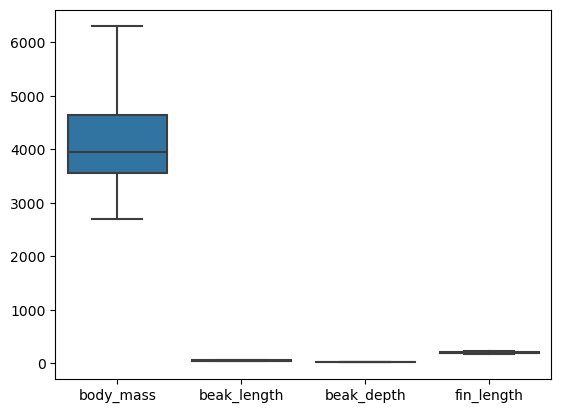

In [21]:
sns.boxplot(data)

c:\Users\public\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='beak_depth', ylabel='Count'>

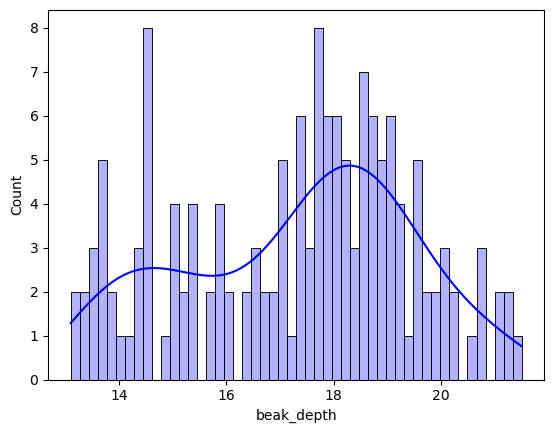

In [22]:
sns.histplot(data["beak_depth"], color='b', bins=50, kde=True, alpha=0.3)

c:\Users\public\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='beak_length', ylabel='Count'>

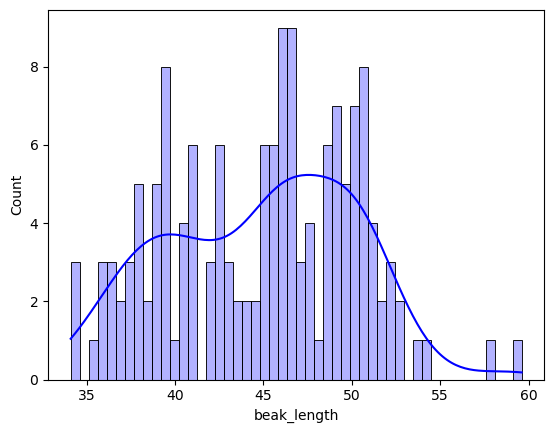

In [23]:
sns.histplot(data["beak_length"], color='b', bins=50, kde=True, alpha=0.3)

c:\Users\public\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='body_mass', ylabel='Count'>

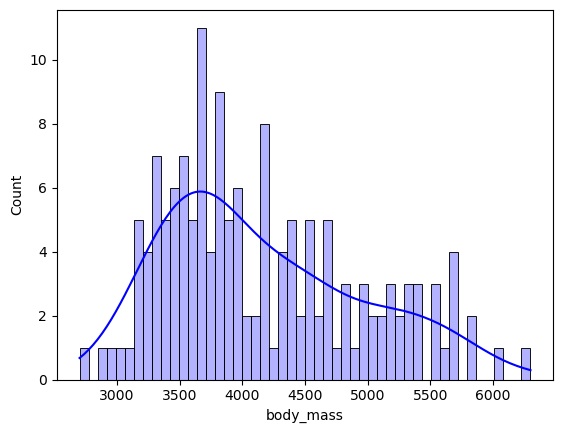

In [25]:
sns.histplot(data["body_mass"], color='b', bins=50, kde=True, alpha=0.3)

c:\Users\public\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fin_length', ylabel='Count'>

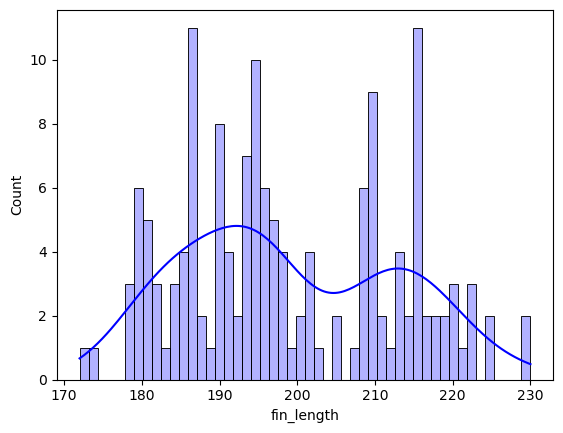

In [26]:
sns.histplot(data["fin_length"], color='b', bins=50, kde=True, alpha=0.3)

In [27]:
data.columns

Index(['gender', 'body_mass', 'beak_length', 'beak_depth', 'fin_length',
       'bird category'],
      dtype='object')

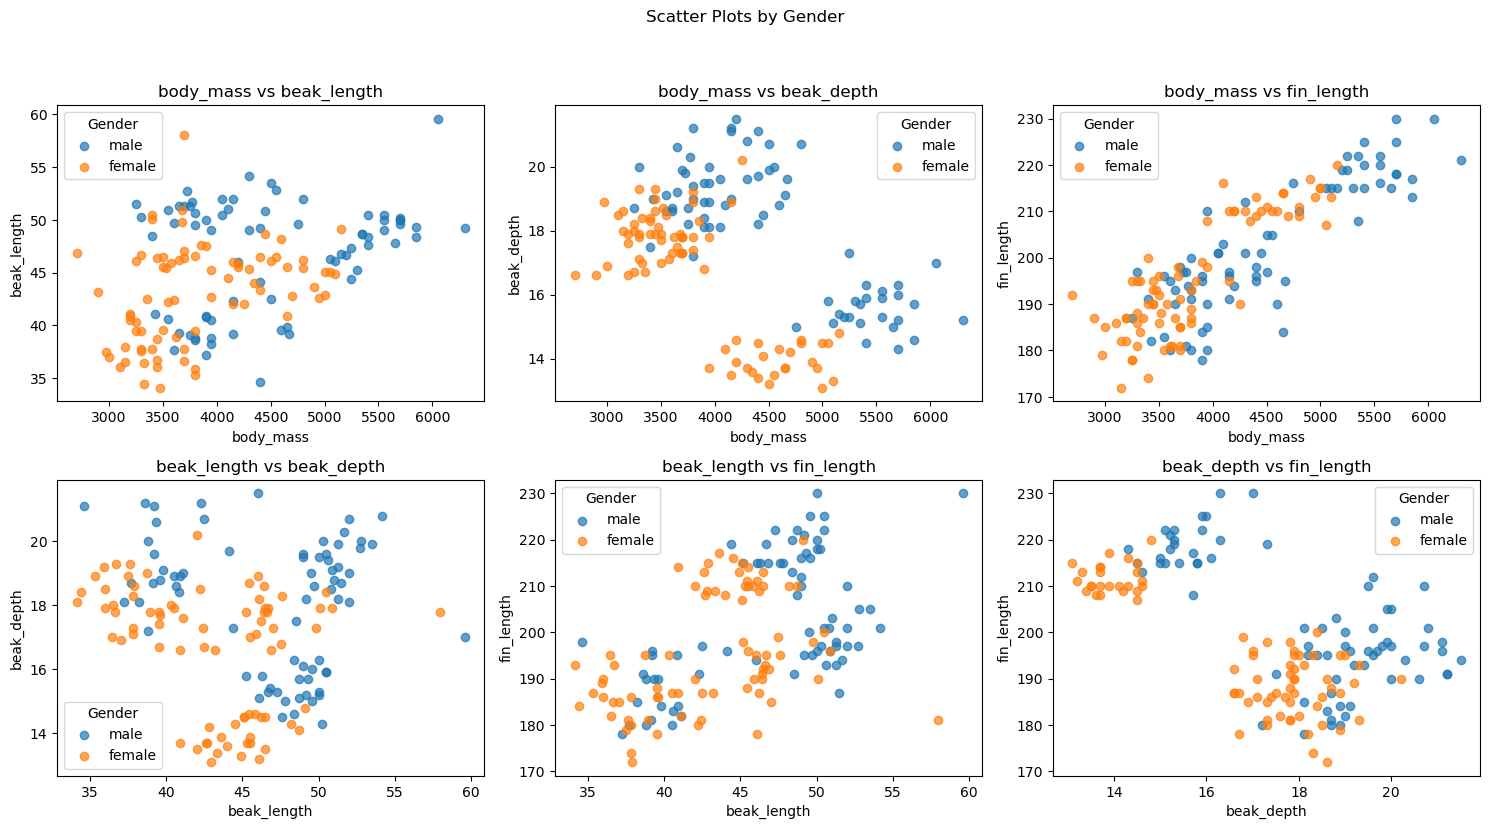

In [28]:
from itertools import combinations
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
features = ['body_mass', 'beak_length', 'beak_depth', 'fin_length']
combinations_pairs = list(combinations(features, 2))

# Plot with gender as legend
plt.figure(figsize=(15, 15))
for i, (x_feature, y_feature) in enumerate(combinations_pairs, 1):
    plt.subplot(4, 3, i)
    for gender in data['gender'].unique():
        subset = data[data['gender'] == gender]
        plt.scatter(subset[x_feature], subset[y_feature], label=gender, alpha=0.7)
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f"{x_feature} vs {y_feature}")
    plt.legend(title='Gender')
plt.suptitle("Scatter Plots by Gender", y=1.02)
plt.tight_layout()
plt.show()

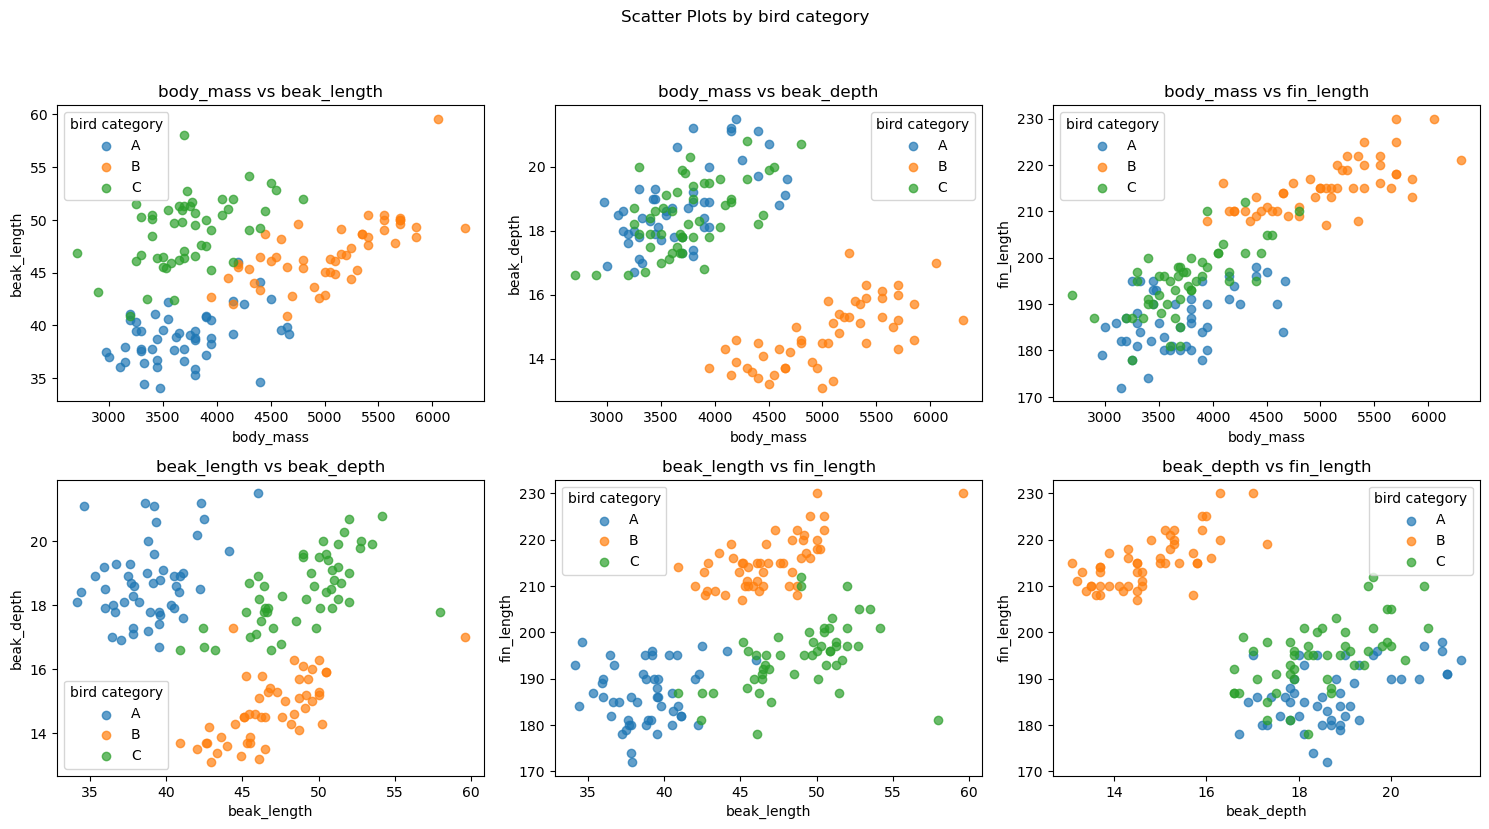

In [30]:
# Plot with species as legend
plt.figure(figsize=(15, 15))
for i, (x_feature, y_feature) in enumerate(combinations_pairs, 1):
    plt.subplot(4, 3, i)
    for species in data['bird category'].unique():
        subset = data[data['bird category'] == species]
        plt.scatter(subset[x_feature], subset[y_feature], label=species, alpha=0.7)
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f"{x_feature} vs {y_feature}")
    plt.legend(title='bird category')
plt.suptitle("Scatter Plots by bird category", y=1.02)
plt.tight_layout()
plt.show()